In [4]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

# S.2 변수의 성격
변수는 크게 나누어 숫자, 문자 값으로 구분할 수 있다. 숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다.

**명목변수**: 남녀 성별과 같이 순서가 없이 이름이 있는 변수를 말한다. 자동차 색과 같이 검은색, 흰색, 파란색이 예가 된다. 사는 지역의 도별 인구수를 계산하는 경우, 종로구, 영등포구 등 구를 명목변수라고 한다.  

**순위변수**: 어떤 순서가 있는 범주에 속하여 그 범주의 이름을 말한다. '초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다. 소득수준을 '차상위', '중위', '상위'로 구분하면 순위변수에 해당된다.

여기서 범주를 등간격으로 **간격변수** Interval variable이라고 한다. 자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

키, 몸무게와 같이 **연속 변수** Continuous variable이 있다.

---

# S.3 샘플링
## 무작위 수
무작위 수는 어떤 값을 가지게 될지 모르는 수를 말한다.

무작위 수는 몸무게와 같이 **연속 continuous** 또는 주사위에서와 같이 1 ~ 6 값을 가지게 되는 **이산적 discrete**일 수 있다.



무작위 데이터를 생성해보자. 이런 데이터는 **연속변수**에 해당한다.

In [5]:
import random

random은 완전하게 무작위 수를 생성하지 않는다.  
random.seed() 함수에 수를 넣으면 이를 기반으로 무작위 수를 생성하지만, **전과 동일한 수가 생성된다** seed 수를 주지 않으면 운영체제 시간을 사용하므로 무작위 수를 생성하게 된다.

In [6]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))
print("3nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519
3nd random number on the basis of the seed 0.36995516654807925


다시 한 번 동일한 seed를 제공하고 무작위 수를 생성하면 이전의 수와 동일한 무작위 수가 생성된다.

In [7]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))
print("3nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519
3nd random number on the basis of the seed 0.36995516654807925


## 무작위 배열
이번에는 numpy를 사용하여 무작위 배열을 생성해 보자.

In [8]:
import numpy as np

In [9]:
print (np.random.random((3,2)))

[[0.63471574 0.78358221]
 [0.89672652 0.3196171 ]
 [0.21636022 0.16982214]]


## 분포에서 무작위 수
분포를 가정하고, 무작위 표본 Sample을 추출할 수 있다.

- `numpy.random.rand`는 균등분포
- `numpy.random.randn`은 표준정규분포 (평균 $\mu=0$, 표준편차 $\sigma=1$)에서 샘플을 추출한다.

In [10]:
np.random.randn()

0.9291901737816084

In [11]:
print (np.random.random_sample( (3,2) ))  #random_sample: 균등분포에서 추출

[[0.72451757 0.52721585]
 [0.21774931 0.72626578]
 [0.07814321 0.64723251]]


In [12]:
import random
print (random.sample([1,2,3,4,6], 2)) #뒤에 써진 숫자가 개수임
print (random.sample([1,2,3,4,6], 3))

[6, 4]
[6, 1, 3]


---
# S.4 균등 분포
주사위를 던져 나오는 수는 1~6이다.

여기서 **얻어지는 주사위 수가 선택될 확률은 동일**하므로, 균등분포 uniform distribution이 된다

## 샘플링
아래 코드는 dice를 리스트로 선언하고, 1에서 6사이의 무작위 수 100개를 생성하여 추가하고 있다.

In [13]:
# random sampling
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1)) #1~6까지

In [14]:
print (dice)

[1, 4, 3, 5, 2, 2, 6, 4, 5, 5, 4, 4, 6, 2, 2, 6, 2, 5, 4, 6, 1, 6, 1, 2, 5, 1, 3, 1, 3, 4, 5, 6, 4, 6, 4, 4, 6, 5, 4, 2, 3, 1, 1, 2, 4, 2, 3, 6, 4, 6, 3, 4, 5, 4, 5, 3, 5, 5, 4, 5, 2, 3, 6, 1, 3, 5, 6, 6, 2, 6, 3, 5, 5, 5, 1, 6, 6, 2, 6, 5, 3, 3, 1, 1, 4, 6, 4, 1, 3, 1, 4, 2, 1, 3, 4, 4, 1, 1, 5, 5]


## 히스토그램
1~6 사이의 빈도수가 몇 개인지 세어보자. 균등분포이므로 $\frac{100}{6} = 16.7$, 즉 16 또는 17회가 발생해야 맞다.

그러나 발생빈도가 평균치를 넘거나 이르지 못한 경우도 존재한다. 주사위 던지는 회수를 늘리면 균등분포에 근사해지게 될 것이다.

In [15]:
# bin의 수가 10개라서 주사위 6개가 아님.
for i in range(1,7):
   print("Dice {}: {}회".format(i, dice.count(i)))

Dice 1: 16회
Dice 2: 13회
Dice 3: 14회
Dice 4: 20회
Dice 5: 19회
Dice 6: 18회


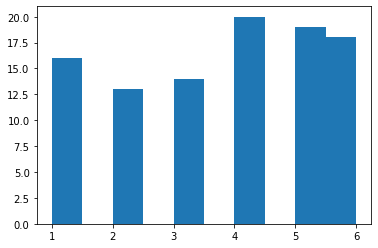

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

위 그래프를 보면, 마지막이 붙어 있다.

앞에서부터 2개의 값을 선택하여 막대가 그려지는데, 마지막 막대를 그리는 경우, 6 이상을 넘어가지 못하게 되어서 그렇다.

이를 교정하기 위해 0.5부터 시작해서 1씩 증가하도록 구간 bin을 구성하자. 0.5-1.5, 1.5-2.5, ... 7개의 값이 필요하다.

In [17]:
import numpy as np
np.arange(0.5, 7)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

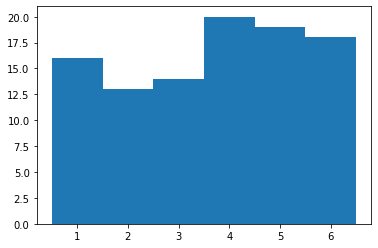

In [18]:
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

---
Pandas로 그려보기 - 더 예쁘게 나옴

numpy array를 pandas의 Series로 변환하고, hist() 함수를 사용하면 된다.

Pandas Series는 dataframe이아니라 일련의 숫자이다.  
컬럼이라고 보면 된다. 컬럼을 1차원으로 저장한 값이다.  
정수, 문자, 소수 등 어떤 값이든 상관없다.

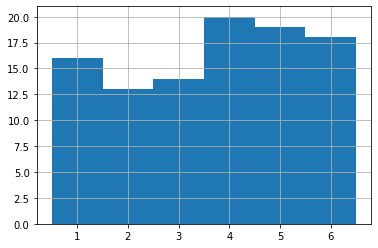

In [19]:
import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

## describe
통계량을 구해보자.  
describe()는 기술통계량 평균, 최소값, 최대값, 표준편차, 건수를 출력한다.  
DataFrame 또는 컬럼을 Series로 변환한 후 describe()를 적용할 수 있다.

In [20]:
import pandas as pd

s=pd.Series(dice)

In [21]:
print (s)

0     1
1     4
2     3
3     5
4     2
     ..
95    4
96    1
97    1
98    5
99    5
Length: 100, dtype: int64


---
# S.5 정규분포
정규분포는 평균을 중심으로 데이터가 집중해 있고, **좌우대칭의 종모양**으로 생긴 분포를 말한다  
키, 몸무게, 온도 등 많은 데이터가 정규분포를 따르고 있다.  
정규분포를 가정하여 데이터를 검증하며, 차이가 유의한지 판별하기도 한다.

## 샘플링
무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며, 평균 $\mu$, 표준편차 $\sigma$를 가지게 된다. 즉, $ X \sim N (\mu, \sigma)$ 무작위 수를 생성하는 함수는:

- random.gauss($\mu, \sigma$)
- random.normalvariate($\mu, \sigma$) - gauss보다 약간 빠름.
참고로 다른 분포에서의 샘플링 함수는 다음과 같다.

- random.uniform(a,b)
- random.betavariate(alpha,beta)
- random.expovariate(lamdb)
- random.gammavariate(alpha,beta)

평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플을 추출해보자.

In [22]:
import numpy as np
comp1=np.random.normal(0, 1, size=200) # 200개를 생성

In [23]:
# 생성한 200개 가운데 5개를 출력해보자.
comp1[:5]

array([-0.17265317, -0.58740446, -0.78440716,  0.57212964, -0.4031905 ])

In [24]:
# 이번에는 평균 10, 표준편차 2, 샘플은 200의 정규분포를 생성해보자.
comp2=np.random.normal(10, 2, size=200)

In [25]:
comp2[:5]

array([ 6.24520386, 14.51177239,  8.44784962,  9.6796405 ,  8.07993478])

## 히스토그램
정규분포에서 무작위 샘플을 추출하는 randn()을 사용해서 histogram 그래프를 그려보자. 정규분포 샘플을 무작위로 100개 생성해보자.

In [26]:
x=np.random.randn(100)

In [27]:
# histogram은 bin(interval)과 bin에 속하는 값을 반환
#  histogram(x)를 실행하면 2개의 행렬이 반환
count, binends = np.histogram(x)

In [28]:
# 반환된 각 빈(간격)에 속한 갯수, 그리고 x축의 간격을 출력
print(count)
print(binends)

[ 1  1 11 14 28 23 10  7  4  1]
[-3.01033598 -2.41912458 -1.82791318 -1.23670178 -0.64549037 -0.05427897
  0.53693243  1.12814383  1.71935524  2.31056664  2.90177804]


(array([ 1.,  1., 11., 14., 28., 23., 10.,  7.,  4.,  1.]),
 array([-3.01033598, -2.41912458, -1.82791318, -1.23670178, -0.64549037,
        -0.05427897,  0.53693243,  1.12814383,  1.71935524,  2.31056664,
         2.90177804]),
 <a list of 10 Patch objects>)

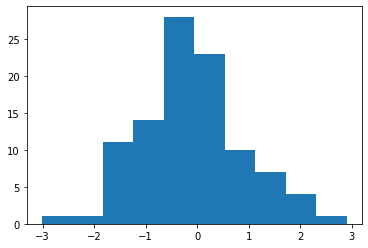

In [29]:
# numpy의 histogram()은 그래프를 생성하지 않으므로, 그림을 그리려면 hist(x)를 실행한다.
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

Pandas로 hist()를 그려보자.  

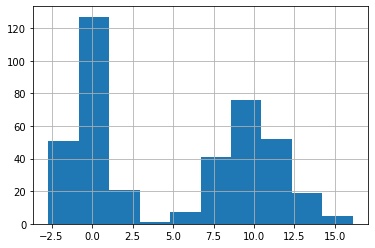

In [30]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2])) # 앞서 생성했던 comp1, comp2를 묶어서 하나의 Series로 만든 다음
values.hist() # hist()를 호출

Pandas의 plot()은 **선그래프**를 그려준다.  
좌측은 평균 0, 표준편차 1이고, 우측은 평균 10, 표준편차 2의 그래프이다.  
당연히 표준편차가 큰 우측 그래프의 변동폭이 더 크다.

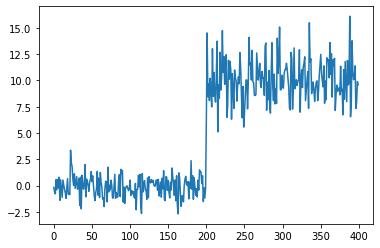

In [31]:
values.plot()
plt.show()

---
# S.6 중심극한정리

평균이 $\mu$, 표준편차가 $\sigma$인 모집단이 있다고하자.  
이 모집단에서 무작위로 표본 $X_1, X_2, \dots X_n$을 추출하면 (바꿔치기가 가능한 sampling with replacement), 그 **표본의 평균** $\bar{X_1}, \bar{X_2}, \dots \bar{X_n}$은 **정규분포**를 따른다는 것이 중심극한정리이다.

모집단이 어떤 분포를 따르더라도, _표본의 크기 n이 충분히 커지면_ (보통 n>30), **표본평균의 분포는 정규분포로 수렴하게 된다.**  
이러한 전제에 따라, 통계적 추정을 할 수 있고, z값을 이용해 확률을 계산할 수 있게 된다.

예를 들어 모집단이 균등분포라고 하자. 앞서 설명했던 주사위는 1 ~ 6까지 동일한 확률로 발생한다. 주사위를 10회 던져서 표본을 구성해보자. 이를 표본1이라고 하자. 이와 같이 표본을 n회 구성해보자. 그러면 표본1의 평균 $\bar{X_1}$ 3.51, $\bar{X_2}$는 3.32, $\bar{X_3}$은 3.81..이 될 것이다. 표본을 30회 정도하면, 표본평균의 표본분포 (sampling distribution of sample means)는 그 형태가 정규분포에 수렴한다.

무작위로 평균 $\mu$, 표준편차 $\sigma$ 모집단이 있다고 하자. 모집단의 평균과 표준편차는 계산할 방법이 없어서 알 수가 없다. 표본을 추출하면, 모집단의 평균 $\mu = \mu_{\bar{x_n}}$, 모집단의 표준편차는 표본의 표준편차를 크기로 나누어 계산할 수 있다 $\sigma =  \frac{\sigma}{\sqrt{n}}$ 따라서 $\frac{\sigma} {\sqrt{n}}$로 계산한다. 주사위 사례에서 n=10이므로, $\frac{\sigma} {\sqrt{10}}$으로 한다.

식으로 표현하면:

$$
z = \frac {\bar{x_n} - \mu} {\sigma / \sqrt{n}} \quad n \rightarrow \infty
$$  



<br><br><br>


정규분포에서 100개의 수를 생성해보자.

In [32]:
import numpy as np
x=np.random.randn(100)

In [33]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: -0.0009522976289428233
median	: -0.0693154701420354


정규분포는 평균, 모드, 최빈값이 같아야 한다.  
하지만 위의 결과를 보면 평균은 0에 가깝고, 최빈값과 다소 차이가 있다.  
정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

## skewness (비대칭도)
**분포의 대칭성을 설명하는 지표**로 skewness를 계산한다.

- `= 0` : 정규분포
- `> 0` : 왼쪽 꼬리가 두툼, 왼쪽으로 비스듬
- `< 0` : 오른쪽 꼬리가 두툼, 왼쪽으로 비스듬

In [34]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: -0.2943975022290306


## kurtosis (첨도)
kurtosis는 분포의 **뾰족한 정도**를 설명한다.

- `= 0` : 정규분포
- `> 0` : 뾰족하고, 꼬리가 두툼
- `< 0` : 편평하고, 꼬리가 얇음

In [35]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: -0.20084336912477818


## Spark로 skewness, kurtosis 계산하기

In [36]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [37]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

numpy array는 바로 Spark DataFrame을 생성할 수 없으므로, Pandas를 경유해서 numpy array를 DataFrame으로 생성하자.

In [38]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [39]:
df=spark.createDataFrame(xPd)

In [40]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+-------------------+--------------------+
|        skewness(x)|         kurtosis(x)|
+-------------------+--------------------+
|-0.2943975022290304|-0.20084336912478262|
+-------------------+--------------------+



---
# S.7 분산
분산을 구하려면 평균 $\bar{x}$, $\bar{y}$를 구해야 한다.

## 평균 계산식
평균을 x의 합계를 개수로 나누어 계산해보자. numpy 평균과 동일하다.

In [41]:
X=x

In [42]:
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X))) #반복하면서 더할필요없다!

simple mean of x = -0.001


## numpy 평균
numpy의 평균을 계산해보자.

In [43]:
import numpy as np

xbar=np.mean(X)
#ybar=np.mean(Y)

In [44]:

print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = -0.001


## 분산 계산식
**분산** variance나 **표준편차** Standard Deviation은 평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포하는지 알려주는 값이다.

- 분산은 평균에서 관측값을 뺀 차이값을 제곱하여 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
- 분산을 제곱근하면 표준편차가 된다.  


분산보다는 표준편차가 더 자주 사용된다.  

In [45]:
#분산 계산
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.8709981966920782


n-1 보정을 해주어서 분산을 계산하면 아래와 같이 미세하게 값이 증가한다.  
이러한 보정은 샘플의 크기가 커지면 영향이 더욱 적어지게 된다.

**n-1 보정을 해주어야 하는 이유**는 하나는 제외해도 되기 때문이다.  
분산을 계산하려면 평균을 알아야 한다. 분산이란 평균에서 얼마나 떨어져 있는지 나타내는 값이기 때문이다. 


모집단에서 5개의 수를 샘플링한다고 하자. 예를 들어 1, 5, 3, 4, 9이라고 하자. 표본의 평균을 알고 있다고 하자.  
그러면 1, 5, 3, 4까지만 샘플링을 해도 평균이 4.4 (22/5)이니까 분산을 계산할 때 마지막 수는 필요하지 않아서 자유도에서 -1을 해주게 된다.  
표본의 평균을 알고 있다면, 마지막 수는 변경될 필요없이 고정된다.

In [46]:
# 자유도 1
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.8753861246981197


표준편차는 variance의 제곱근으로 계산한다.  


ddof는 Delta Degrees of Freedom으로, 기본 값은 ddof=0이지만, 1로 해서 계산한다.

In [47]:
#var 이용해서 표준편차 구한 후 sqrt(제곱근)이용
sx=np.sqrt(np.var(X,ddof=1))
#sy=np.sqrt(np.var(Y,ddof=1))
#print("sx:",sx, "sy:",sy)

## numpy 분산 계산
numpy로 계산해도, 값은 동일하다.

In [48]:
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1)) # ddof=1

0.8709981966920783
0.8753861246981199


In [49]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # a에서 50%정도에 해당하는 값
print (p) # 3

3.0


## boxplot
전체 관측값을 정렬하고, 전체를 4분위로 나누면 IQR Interquatile Range을 구할 수 있다.  


Boxplot은 IQR의 Q1~Q3을 사각형으로 표시한다. pandas를 이용하거나, matplotlib으로 Boxplot을 그릴 수 있다.

사각형의 주황색 선은 평균을 말한다.

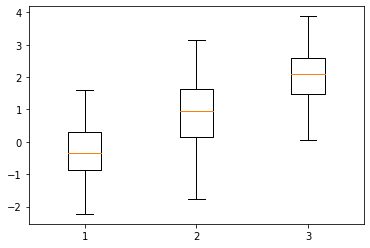

In [50]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # 평균=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()

---
# S.8 zscore, tscore
zscore는 각 측정 값을 평균에서 빼고난 후 표준편차로 나누어 계산된다.

이 식을 이해하면, **평균에서 표준편차의 몇 배가 떨어져 있는지를 말한다. 표준편차의 배수로 떨어진 정도를 정규화(표준화)한다는 의미**가 있다.

z는 모집단의 평균, 표준편차를 알 경우, 그러나 샘플링을 할 경우는 n-1로 나눈다 (numpy에서는 ddof=1이 default). 따라서 아래 계산에서는 ddof=1로 한다.

모집단의 zscore when variance is known$$
z = \frac {\bar{x_n} - \mu} {\sigma / \sqrt{n}} 
$$

In [51]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

## zscore 계산식

In [52]:
import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0

sx=np.std(X,ddof=1)
for x in X:
   zscore=(x-xbar)/sx
   print (zscore, end= ' ') #출력시 공백을 하나씩!

-0.6410300618768864 -1.5286101475525755 -0.04931000475976033 -0.04931000475976033 -0.9368900904354495 1.1341301094744918 -0.04931000475976033 1.725850166591618 -1.2327501189940124 -0.04931000475976033 0.5424100523573657 1.1341301094744918 

## stats zscore
계산식 말고 바로 라이브러리 이용

In [53]:
from scipy import stats

In [54]:
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])

## cdf (누적확률)
추론통계에서 확률을 계산하는 것은 중요하다. p-value와 신뢰구간의 계산에 필요하다.  

**cdf**(Cumulative Distribution Function)는 **누적확률**을 의미한다.  
정규분포에서 평균과 표준편차는 0,1을 기본 값으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.  


$\mu \pm 1\sigma$ 모집단 68.27%  
$\mu \pm 2\sigma$ 모집단 95.45%  
$\mu \pm 3\sigma$ 모집단 99.73%

In [55]:
from scipy.stats import norm

norm.cdf(0, loc=0, scale=1)

0.5

In [56]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [57]:
norm.cdf(2) - norm.cdf(-2) #3sigma를 벗어나면 이상값이라고 할 수 있을듯?

0.9544997361036416

## ppf
Percent Point Function 확률의 점 값을 계산한다.  
0.5, 즉 50% 확률의 zscore는 0이다. 0.001, 즉 0.1%의 확률의 zscore는 -3.09이다.

In [58]:
norm.ppf([0.001, 0.5, 0.9545])

array([-3.09023231,  0.        ,  1.69014614])

ppf는 cdf의 역이다. 아래와 같이 위 ppf계산 결과를 cdf에 넣으면 ppf를 계산할 수 있다.

In [59]:
norm.cdf([-3.09023231,  0.        ,  1.69014614])

array([0.001 , 0.5   , 0.9545])

## tscore
표본의 크기가 크면 모집단과 차이가 없는데, **표본이 작으면** 어떻게 될까? 이 경우 사용하는 것이 t분포이다.  

t분포는 정규분포와 유사한 모양을 가지고 있지만, 꼬리가 두툼한 특징을 가지고 있다.  

따라서 평균에서 멀어진 값을 샘플링할 확률이 높아지게 된다. n이 일정 규모로 커지면 t분포와 정규분포와 유사하게 된다.

In [60]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

In [61]:
t.cdf(1, 1, loc=0, scale=1)

0.7500000000000002

---
# S.9 outliers
정규분포를 따른다고 했을 경우, 분포의 표준편차 범위3은 발생하기 어렵다. 이러한 일정 범위를 넘어선 값은 이상값이다. 따라서, 이런 경우 분석에 앞서:

- 이상값의 어떤 기준은 판별하는가?
- 왜 그런 값이 발생했는지, 올바르지 않은 입력인지 판단한다.
- 이상값을 제외하고 나면 통계량은 어떻게 변했는지 알아본다.


아래의 예에서 표준편차 2배 보다 큰 경우 이상 값으로 보고, 제외한다.

In [62]:
import numpy as np

def reject_outliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)] #outlier을 2시그마로봄
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = reject_outliers(d)
print (filtered_d)

[2, 4, 5, 1, 6, 5]
